In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path

from matplotlib import rcParams
rcParams['figure.dpi'] = 300

In [2]:
h5pypath= '/work/gg0877/g260204/data/pickle_files/' 
greens = ['#b2ff66','#80ff00','#00cc00','#00994c','#006600','#193300']
plot_path = '/work/gg0877/g260204/sim_data/SR5yr/plots/plots/srm036/'
sim = 'srm036'
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

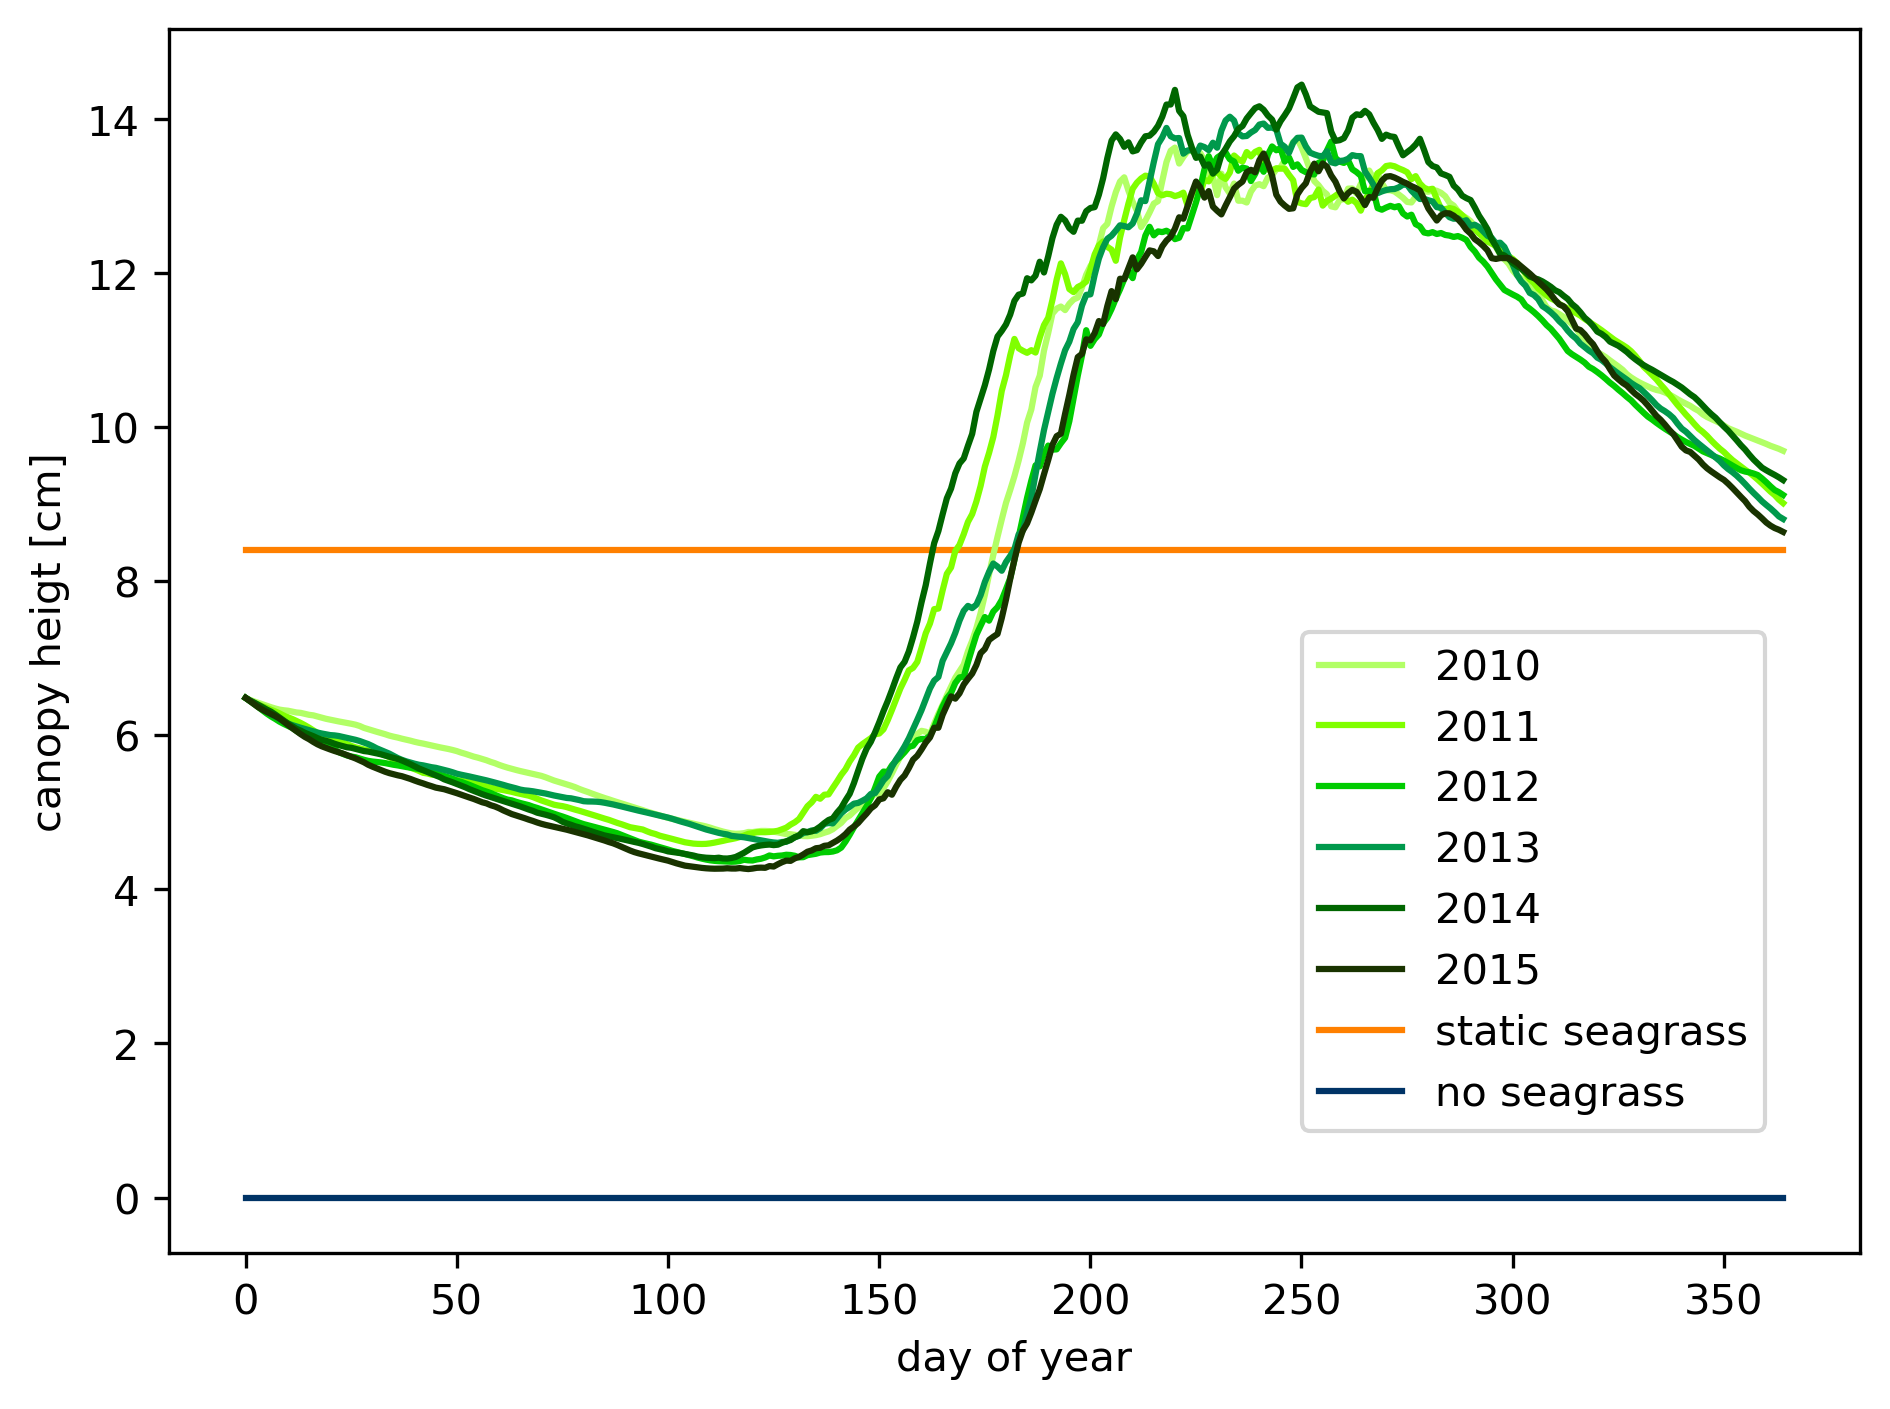

In [3]:
fig=plt.figure()
hcan_sum = 0
hcan_len = 0
for i in range(2010,2016):
    f = h5py.File(h5pypath+sim +'_'+str(i)+'_hcan_meadows.hdf5','r')
    hcan = np.array(f['hcan'])
    time = np.array(f['time'])
    plt.plot(time,hcan*100,label=str(i),color=greens[i-2010])
    f.close()
    hcan_sum += np.sum(hcan*100)
    hcan_len += len(hcan)

plt.plot(time,np.ones(np.size(time))*8.4,color='#ff8000',label='static seagrass',zorder=0)
plt.plot(time,np.zeros(np.size(time)),color='#003366',label='no seagrass')
plt.legend(loc=(0.67,0.1))
plt.xlabel('day of year')
plt.ylabel('canopy heigt [cm]')

plt.tight_layout()
plt.savefig(plot_path + 'sghcanchange_hcan0.png')


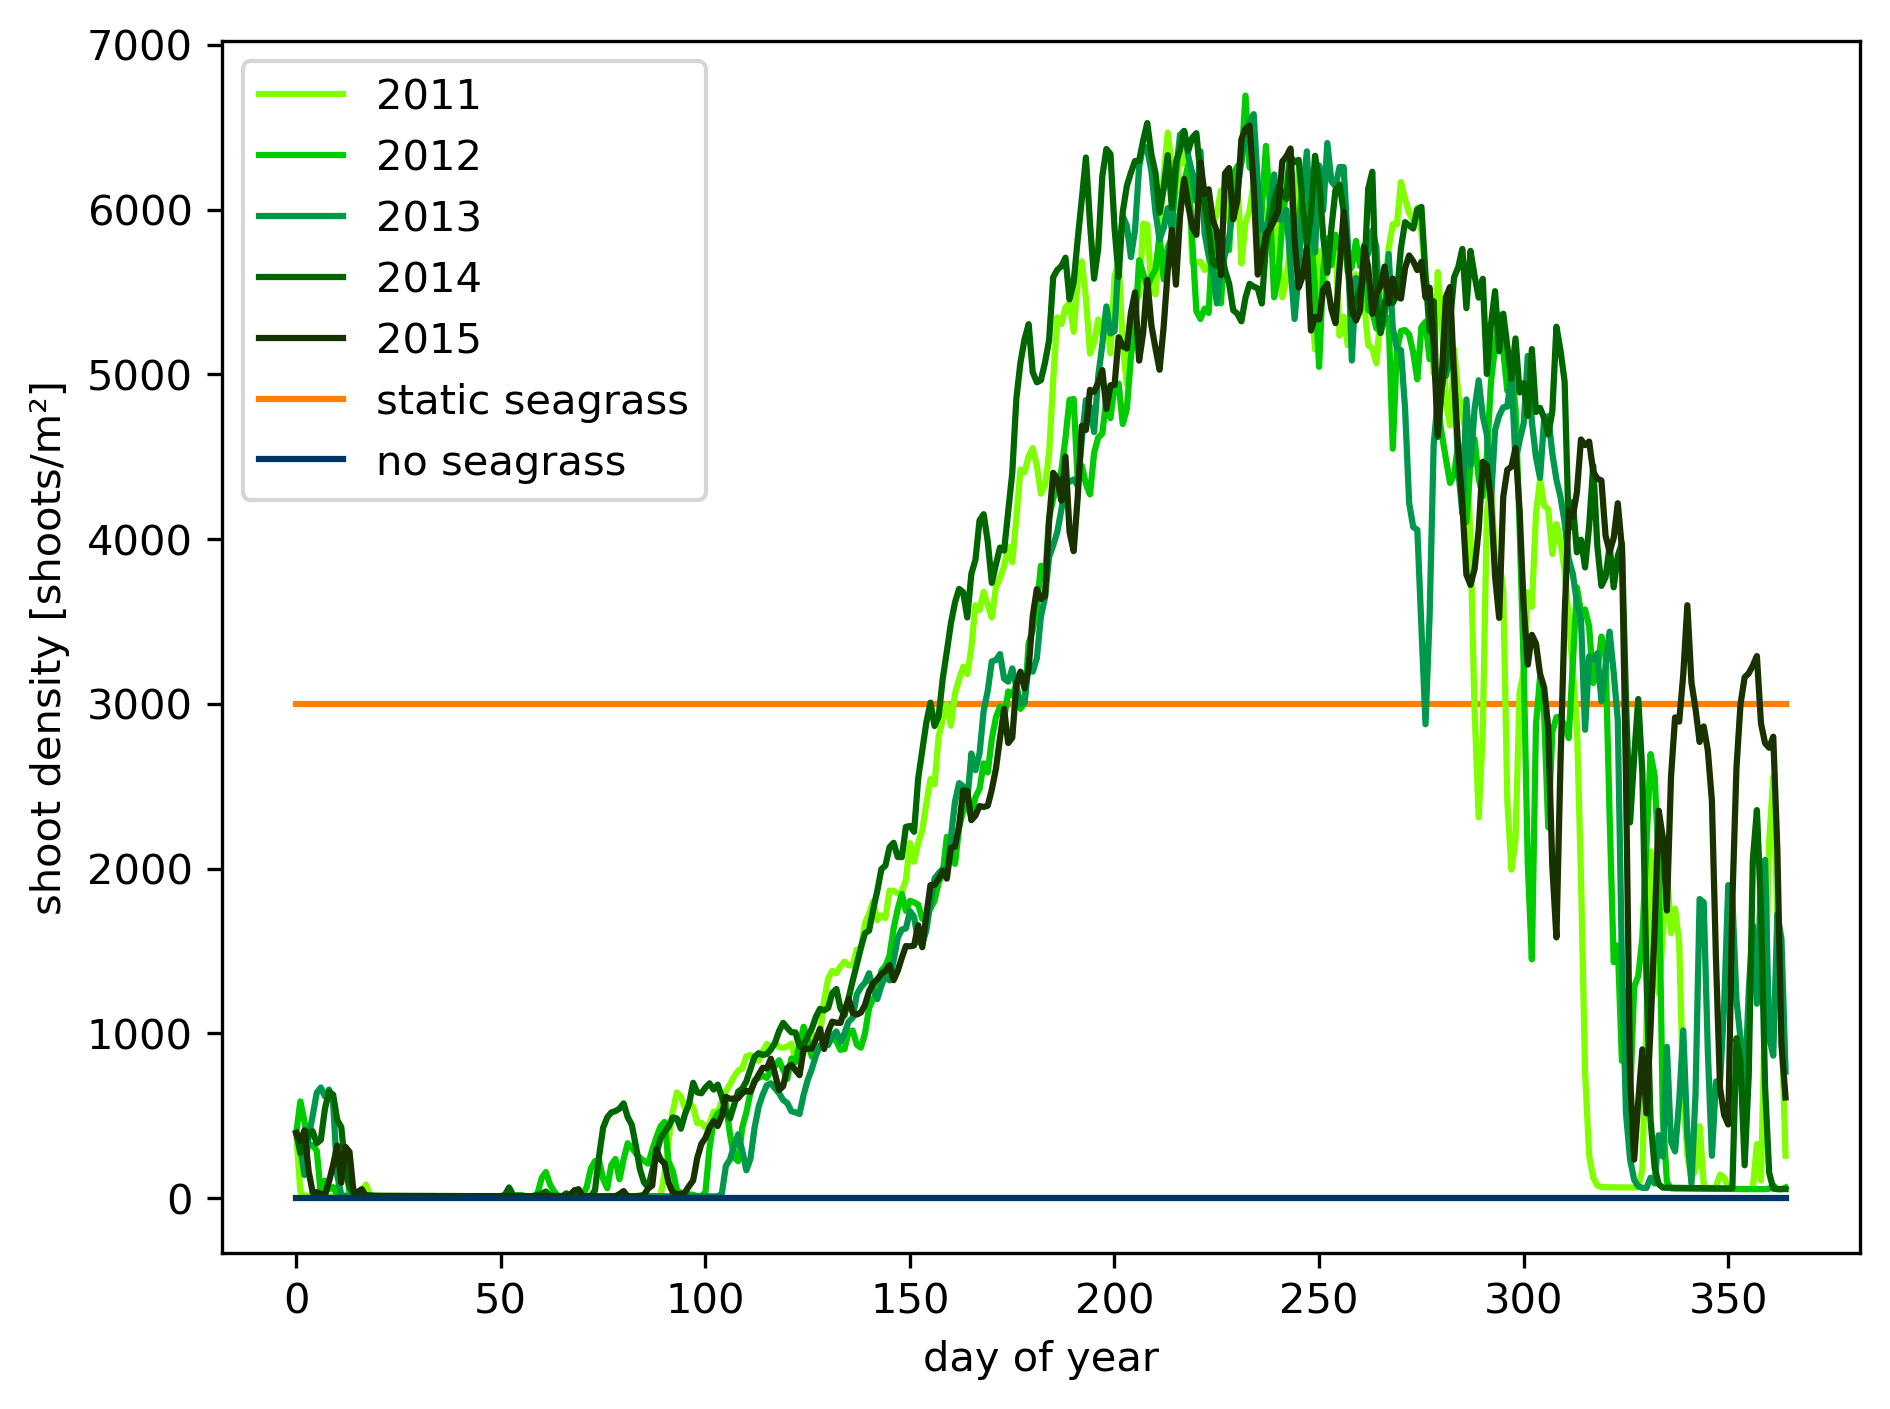

In [4]:
fig=plt.figure()
nsav_sum = 0
nsav_len = 0
for i in range(2011,2016):
    f = h5py.File(h5pypath+sim + '_'+str(i)+'_nsav_meadows.hdf5','r')
    hcan = np.array(f['nsav'])
    time = np.array(f['time'])
    plt.plot(time,hcan,label=str(i),color=greens[i-2010])
    f.close()
    nsav_sum += np.sum(hcan)
    nsav_len += len(hcan)

plt.plot(time,np.ones(np.size(time))*3000,color='#ff8000',label='static seagrass',zorder=0)
plt.plot(time,np.zeros(np.size(time)),color='#003366',label='no seagrass')
plt.legend()
plt.xlabel('day of year')
plt.ylabel('shoot density [shoots/m²]')

plt.tight_layout()
plt.savefig(plot_path + 'sghcanchange_nsav0.png')


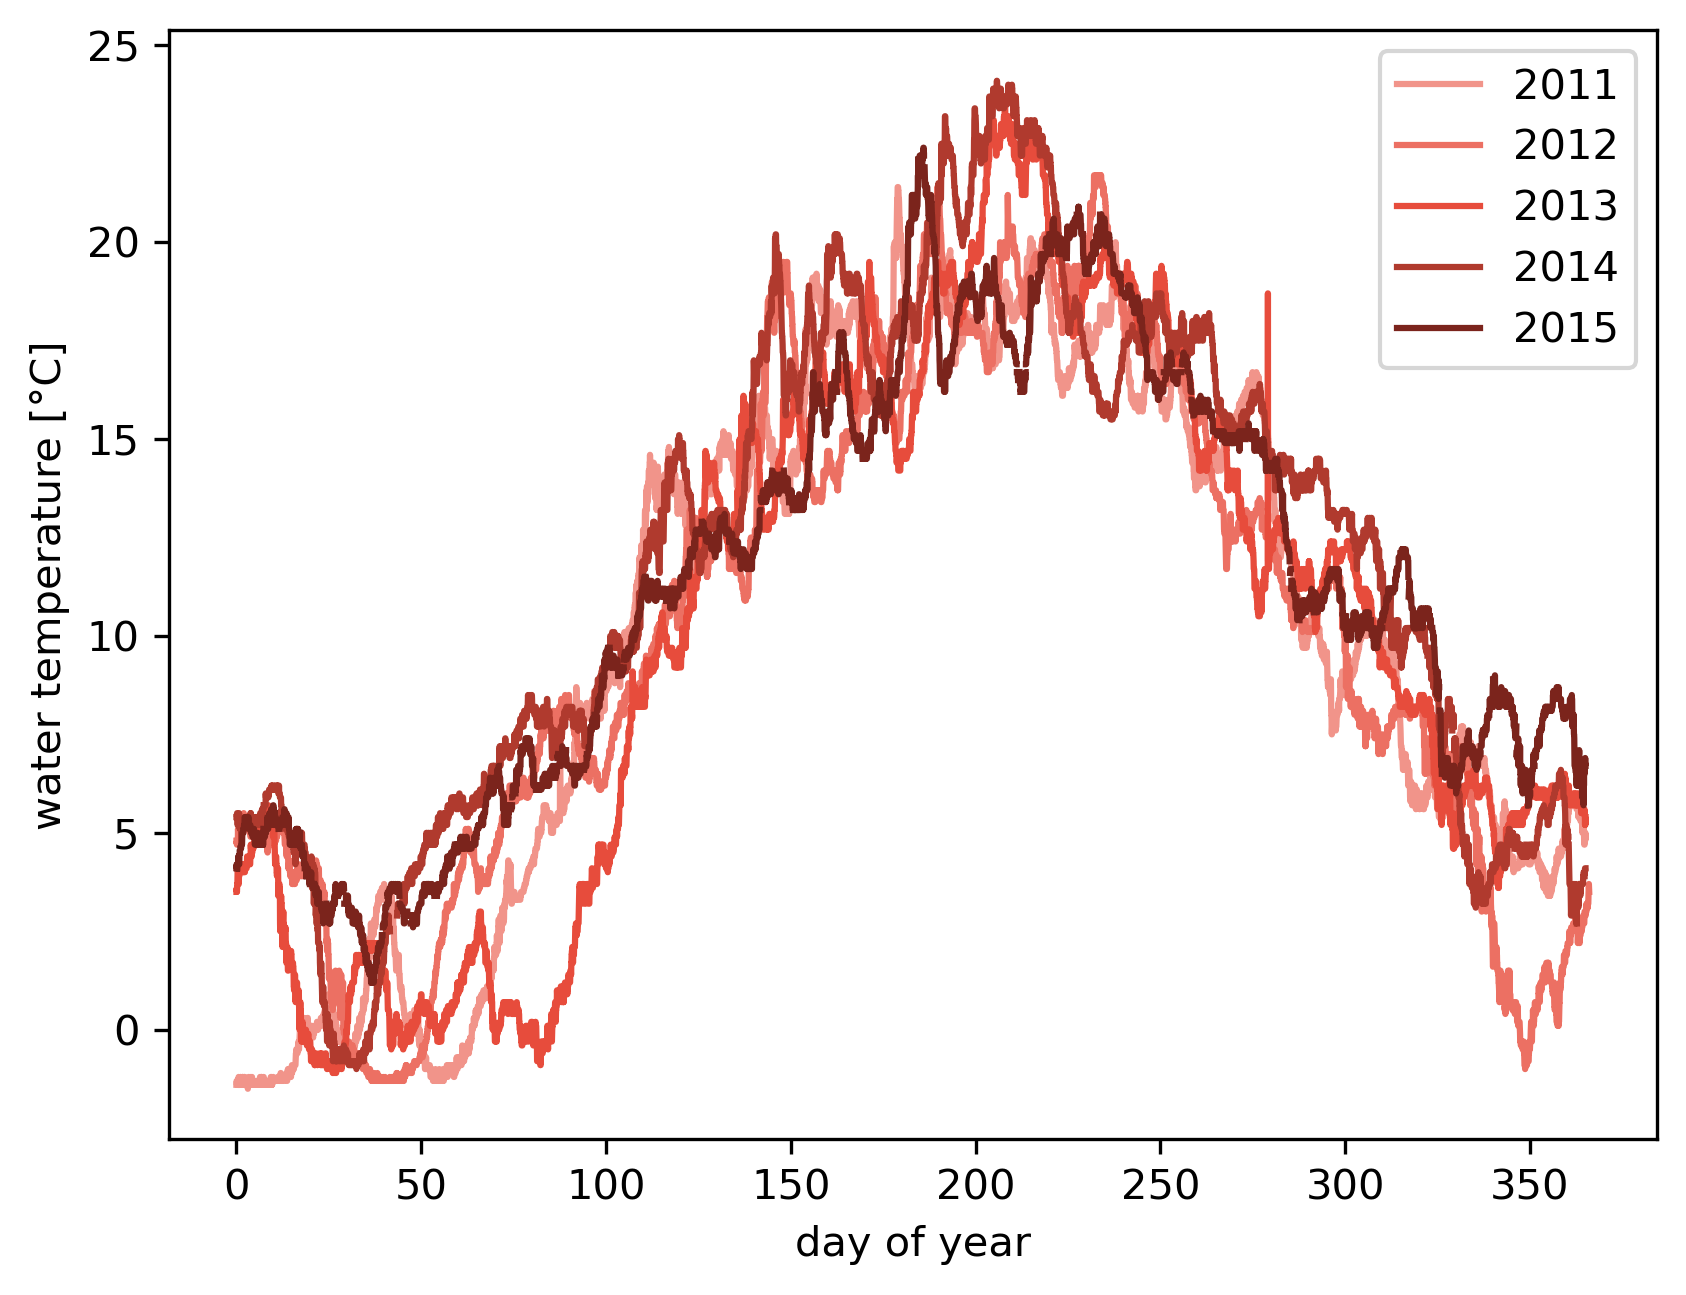

In [7]:
from netCDF4 import Dataset
from datetime import datetime
reds = ['#f5b7b1','#f1948a','#ec7063','#e74c3c','#b03a2e','#7b241c']
for i in range(2011,2016):
    pat = '/work/gg0877/g260204/data/01_observations/t/HAV/'
    ncf = Dataset(pat+'t_HAV_'+str(i)+'.nc')
    t = ncf['t'][:]
    time = ncf['time'][:]
    delta = datetime(i, 1, 1, 0, 0)-datetime(1970, 1, 1)
    ts = (time-delta.total_seconds())/60/60/24
    plt.plot(ts,t,label=str(i),color=reds[i-2010])
    plt.xlabel('day of year')
    plt.ylabel('water temperature [°C]')
plt.legend()
plt.savefig(plot_path + 'wt_obs.png')

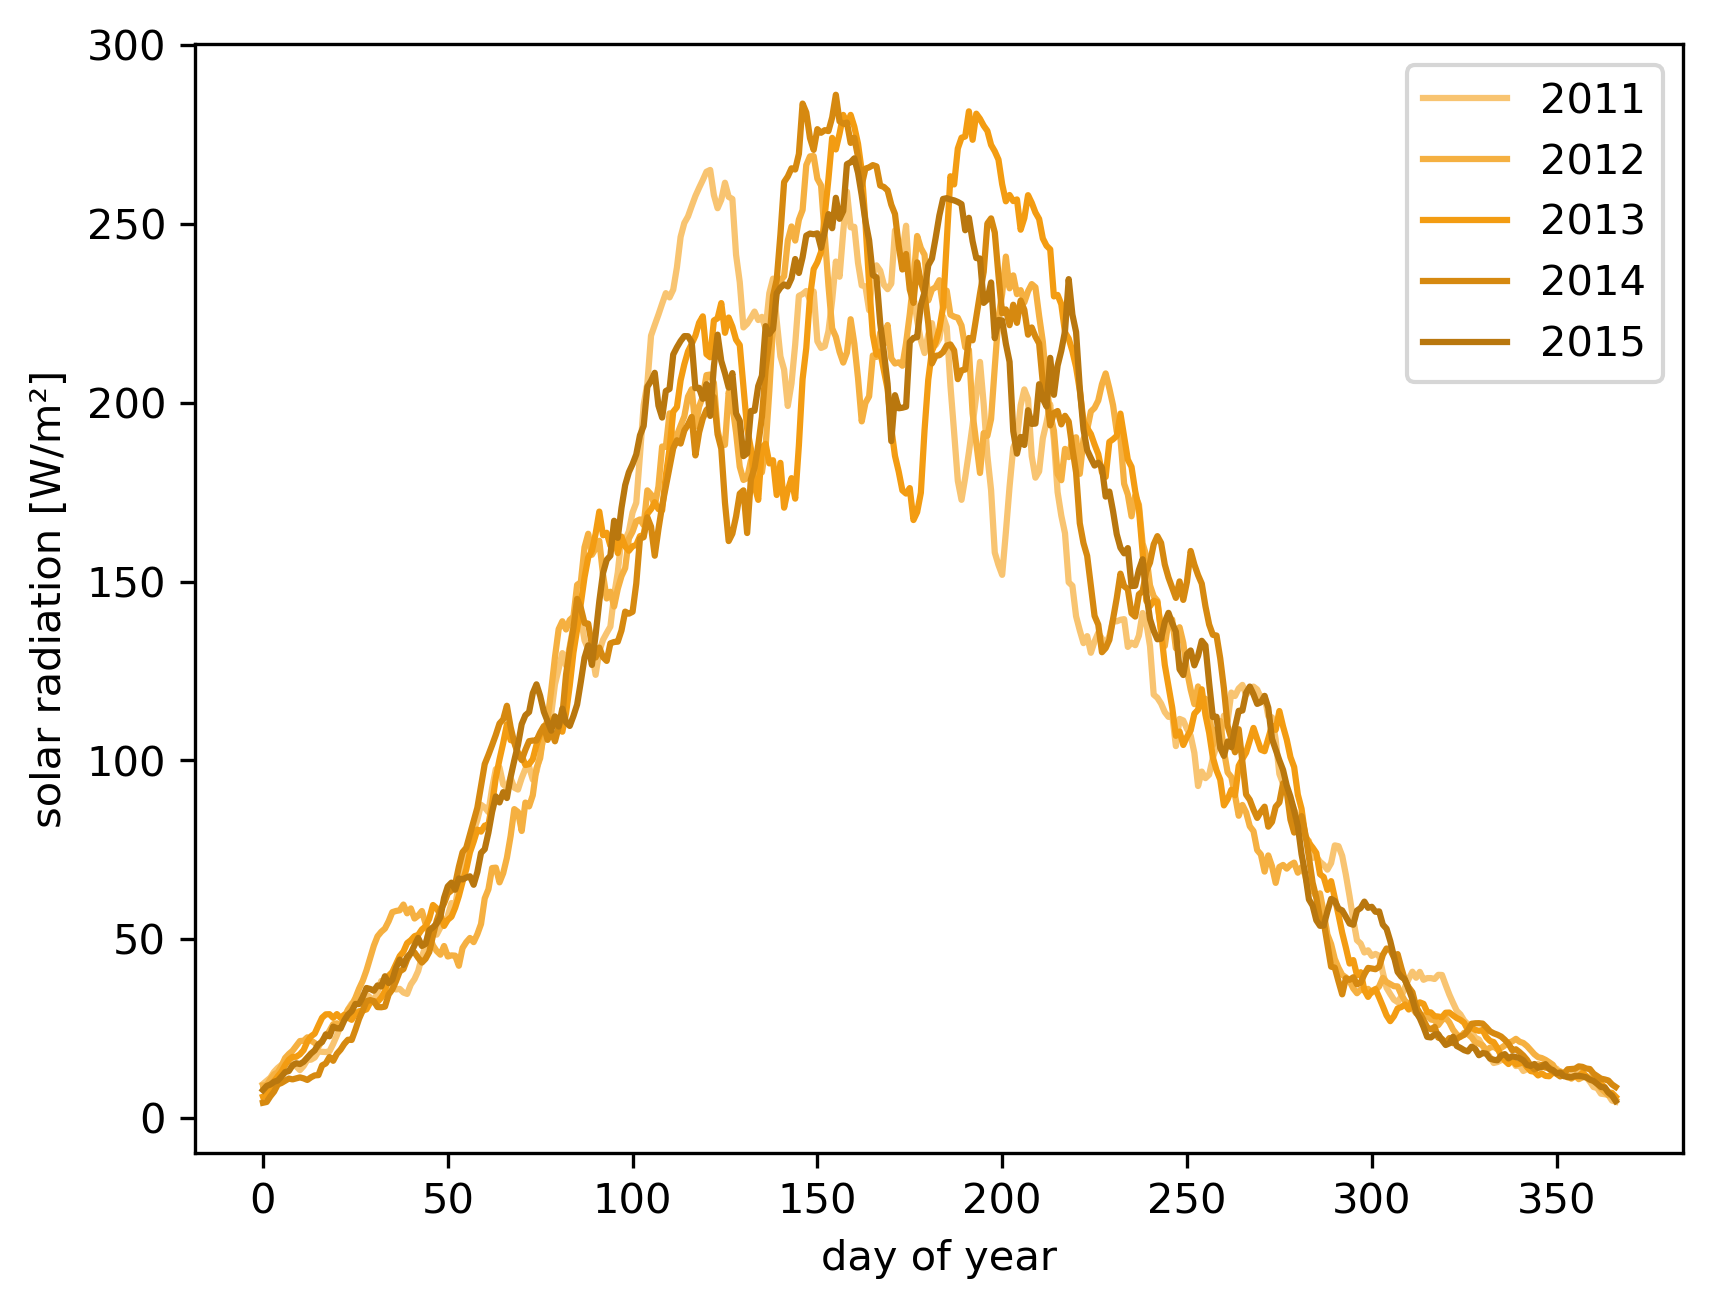

In [8]:
years = range(2011,2016)
months = range(1,13)
N = 15
mode = 'same'

yellows = ['#fad7a0','#f8c471','#f5b041','#f39c12','#d68910','#b9770e']

for y in years:
    srad_mean = np.zeros(367)
    d=0
    for m in months:
        ncpat = '/home/g/g260204/SR5yr/srm022_'+str(y)+'/sflux/sflux_rad_1.00'+str(m).zfill(2)+'.nc'
        #loc in sr bight [265,306]
        ncdata = Dataset(ncpat,'r')
        srad = ncdata['dswrf'][:,265,306]
        for i in range(0,len(srad),24):
            srad_mean[d] = np.mean(srad[i:i+24])
            d=d+1
    plt.plot(np.convolve(srad_mean, np.ones(N)/N, mode=mode),label=str(y),color=yellows[y-2010])
plt.xlabel('day of year')
plt.ylabel('solar radiation [W/m²]')
plt.legend()

plt.savefig(plot_path + 'swrad_obs.png')